In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
gdp_df= pd.read_csv("..\data\gdp_percapita.csv.csv")

How many rows and columns are in `gdp_df`? What are the data types of each column

In [3]:
gdp_df.shape

(8219, 4)

In [4]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [5]:
gdp_df=gdp_df.drop(columns=['Value Footnotes'])

In [6]:
gdp_df=gdp_df.rename(columns={'Country or Area' : 'Country',
                              'Year' : 'Year',
                              'Value':'GDP_Per_Capita'})
                              

How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
years=gdp_df['Year'].nunique()

In [8]:
years

34

In [9]:
country_years=gdp_df.groupby("Country")["Year"].nunique()

In [10]:
country_years

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 247, dtype: int64

In [11]:
# Countries with all years data
country_all_years = country_years[country_years == years ]

In [12]:
country_all_years

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 228, dtype: int64

In [13]:
# Countries with missing years data
country_missing_years = country_years[country_years < years ]

In [14]:
country_missing_years

Country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: Year, dtype: int64

In [15]:
per_year = gdp_df['Year'].value_counts()
per_year

Year
2020    247
2021    247
2013    247
2016    247
2019    247
2018    247
2017    247
2014    247
2015    247
2022    246
2011    246
2012    246
2009    245
2010    245
2008    244
2007    242
2006    242
2005    241
2003    241
2004    241
2002    241
2023    240
2001    240
2000    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

Create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [16]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


Text(0, 0.5, 'Countries')

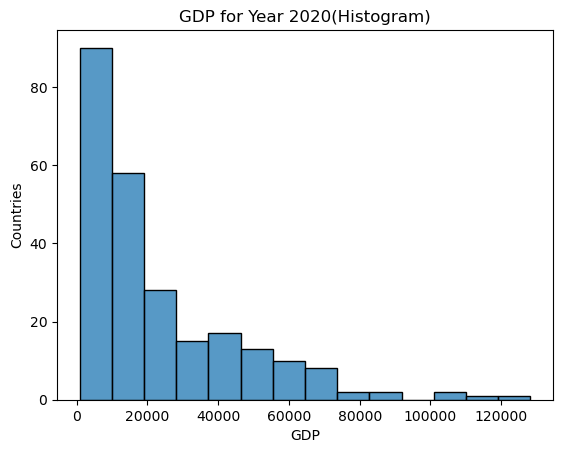

In [17]:
sns.histplot(gdp_2020['GDP_Per_Capita'])
plt.title('GDP for Year 2020(Histogram)')  
plt.xlabel('GDP') 
plt.ylabel('Countries')   


Text(0, 0.5, 'Countries')

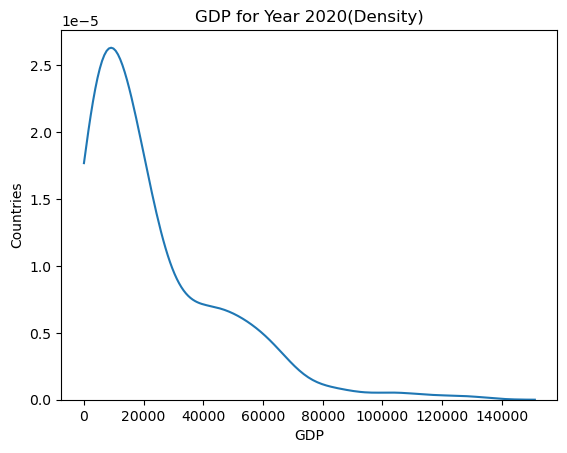

In [18]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'],clip=(0,None))
plt.title('GDP for Year 2020(Density)')  
plt.xlabel('GDP') 
plt.ylabel('Countries')   

Text(0.5, 1.0, 'GDP for Year 2020(boxplot)')

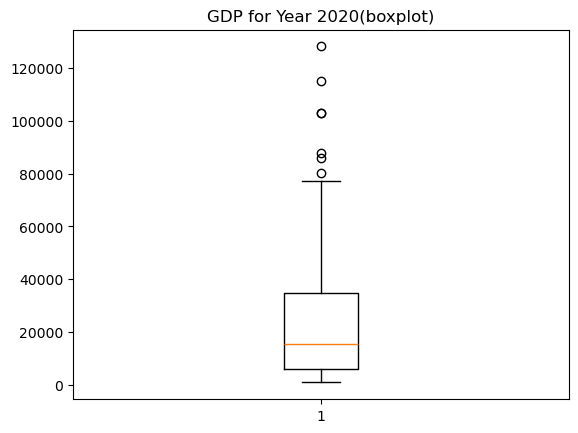

In [19]:
plt.boxplot(gdp_2020['GDP_Per_Capita'])
plt.title('GDP for Year 2020(boxplot)')  
  

Text(0, 0.5, 'GDP')

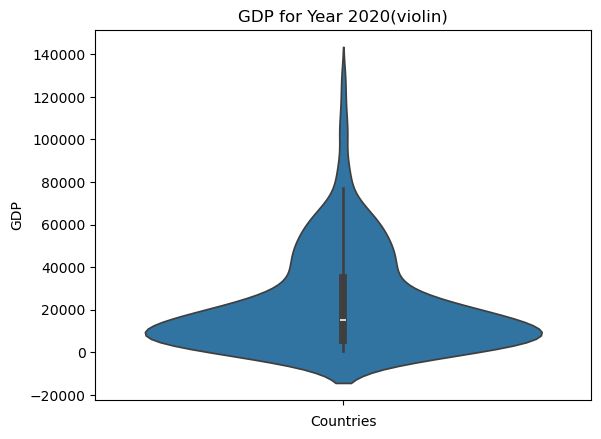

In [20]:
sns.violinplot(gdp_2020['GDP_Per_Capita'])
plt.title('GDP for Year 2020(violin)')  
plt.xlabel('Countries') 
plt.ylabel('GDP') 
  

What was the median GDP per capita value in 2020?


In [21]:
gdp_median_2020 = gdp_2020['GDP_Per_Capita'].median()
print(gdp_median_2020)

15309.23598817024


create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.

In [22]:
years = [1990, 2000, 2010, 2020]
gdp_decades = gdp_df[gdp_df['Year'].isin(years)]
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

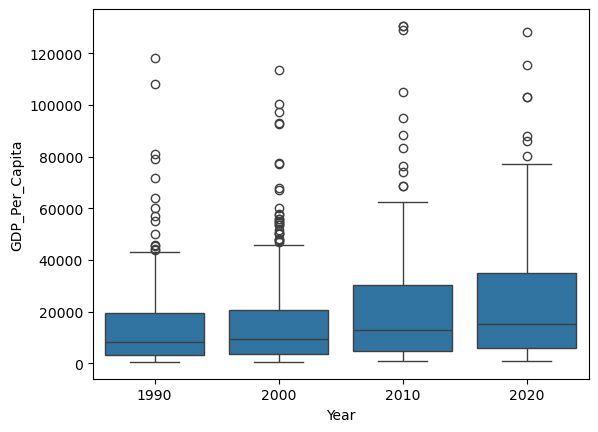

In [23]:
sns.boxplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

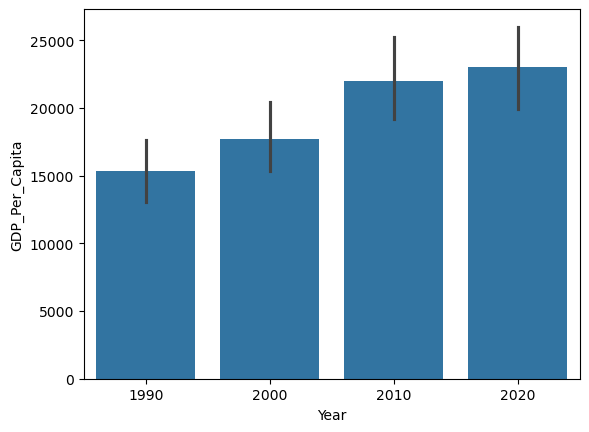

In [24]:
sns.barplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

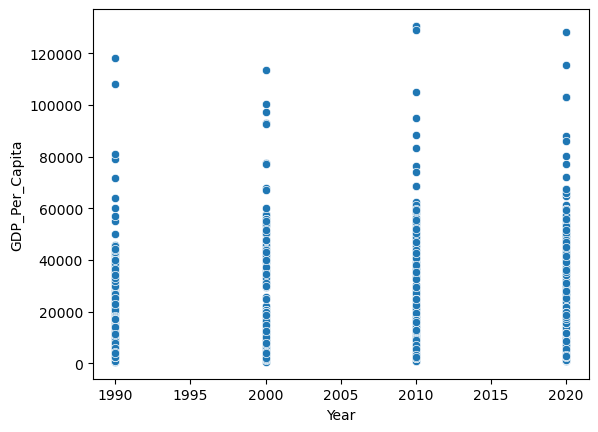

In [25]:
sns.scatterplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

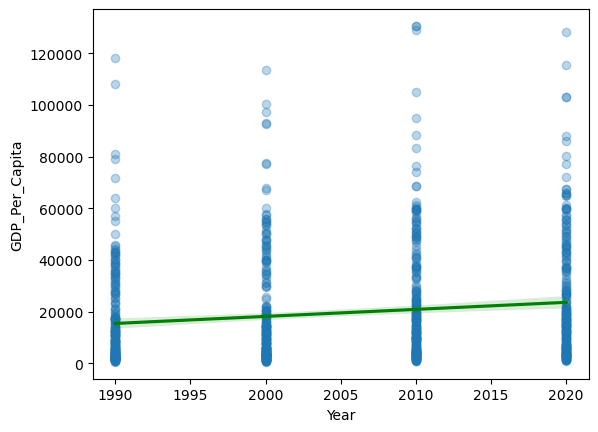

In [26]:
sns.regplot(x='Year',y='GDP_Per_Capita',data=gdp_decades,scatter_kws={"alpha": 0.3}, line_kws={"color": "green"})

Which country was the first to have a GDP per capita greater than $100,000?

In [27]:
gdp_greater = gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values(by='Year', ascending=True)
gdp_greater

# Brunei	1990	118163.683198
# United Arab Emirates	1990	108057.042464


,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
4423,Luxembourg,2023,130373.477942
6511,Singapore,2023,127543.554752


Which country had the highest GDP per capita in 2020? 

In [28]:
gdp_highest = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita'].max()

gdp_high_country =gdp_df.loc[(gdp_df['Year'] == 2020) & (gdp_df['GDP_Per_Capita'] == gdp_highest)]
gdp_high_country


,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


Create a plot showing how this countrys GDP per capita has changed over the timespan of the dataset.

In [29]:
country_max = gdp_high_country['Country']
country_high_all = gdp_df[gdp_df['Country'].isin(country_max)].sort_values(by='Year')
country_high_all

,Country,Year,GDP_Per_Capita
4456,Luxembourg,1990,80947.492013
4455,Luxembourg,1991,86774.421292
4454,Luxembourg,1992,87187.534357
4453,Luxembourg,1993,89638.568901
4452,Luxembourg,1994,91804.800586
4451,Luxembourg,1995,91820.682744
4450,Luxembourg,1996,91845.705109
4449,Luxembourg,1997,95617.478227
4448,Luxembourg,1998,100738.594873
4447,Luxembourg,1999,107512.224551


Text(0.5, 1.0, 'GDP per Capita Over Time')

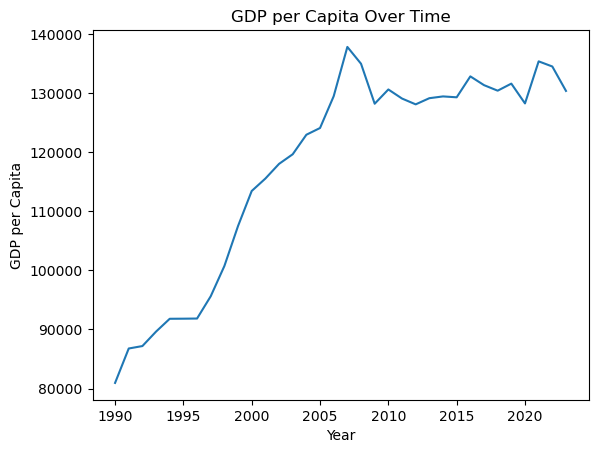

In [30]:
plt.plot(country_high_all['Year'], country_high_all['GDP_Per_Capita'])
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Over Time')

 Which country had the lowest GDP per capita in 2020? 
Create a plot showing how this countrys GDP per capita has changed over the timespan of the dataset.


In [31]:
gdp_lowest = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita'].min()

gdp_low_country =gdp_df.loc[(gdp_df['Year'] == 2020) & (gdp_df['GDP_Per_Capita'] == gdp_lowest)]
gdp_low_country


,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


In [32]:
country_min = gdp_low_country['Country']
country_low_all = gdp_df[gdp_df['Country'].isin(country_min)].sort_values(by='Year')
country_low_all

,Country,Year,GDP_Per_Capita
1076,Burundi,1990,1396.077627
1075,Burundi,1991,1435.819561
1074,Burundi,1992,1412.060546
1073,Burundi,1993,1366.292153
1072,Burundi,1994,1305.452080
1071,Burundi,1995,1132.218782
1070,Burundi,1996,1040.922315
1069,Burundi,1997,1024.449954
1068,Burundi,1998,1052.807034
1067,Burundi,1999,1017.497778


Text(0.5, 1.0, 'GDP per Capita Over Time')

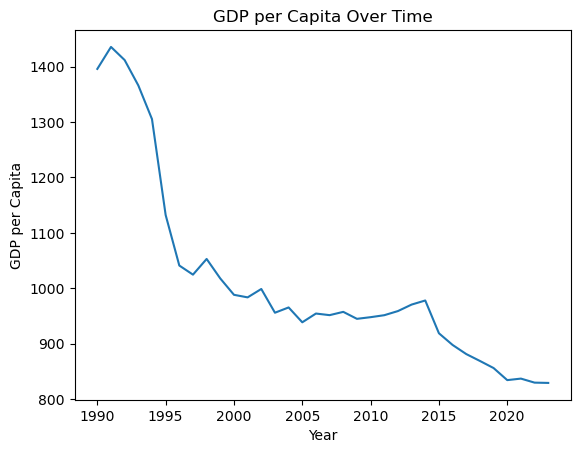

In [33]:
plt.plot(country_low_all['Year'], country_low_all['GDP_Per_Capita'])
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Over Time')

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990?
Which countries had lower GDP per capita in 2020 than in 1990?

In [34]:
gdp_1990 = gdp_df[gdp_df['Year'] == 1990][['Country', 'GDP_Per_Capita']].rename(columns={'GDP_Per_Capita': 'GDP_1990'})


In [35]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020][['Country', 'GDP_Per_Capita']].rename(columns={'GDP_Per_Capita': 'GDP_2020'})

In [36]:
gdp_1990_2020 = pd.merge(gdp_1990,gdp_2020,on='Country')
gdp_1990_2020['GDP_Difference']= gdp_1990_2020['GDP_2020'] - gdp_1990_2020['GDP_1990']
gdp_1990_2020.sort_values(by='GDP_Difference',ascending=False)

,Country,GDP_1990,GDP_2020,GDP_Difference
100,Ireland,29567.221992,102989.787335,73422.565343
186,Singapore,45371.006902,115304.149459,69933.142557
127,Luxembourg,80947.492013,128256.560341,47309.068327
109,Korea,13725.039472,45976.534578,32251.495105
134,Malta,18166.707616,50281.730929,32115.023313
...,...,...,...,...
122,Libya,18121.815655,9976.037403,-8145.778252
182,Saudi Arabia,60101.575626,51782.568653,-8319.006973
150,Nauru,30546.301797,11441.258450,-19105.043347
27,Brunei,118163.683198,80280.897948,-37882.785250


In [37]:
low_gdp_2020 = gdp_1990_2020[gdp_1990_2020['GDP_Difference'] <0]
low_gdp_2020

,Country,GDP_1990,GDP_2020,GDP_Difference
10,Aruba,34579.220640,28521.688852,-6057.531788
16,Barbados,16976.761648,15749.038017,-1227.723631
27,Brunei,118163.683198,80280.897948,-37882.785250
30,Burundi,1396.077627,833.920257,-562.157369
37,Central African Republic,1481.252551,1136.570530,-344.682021
44,Congo,8699.526839,6350.509134,-2349.017705
49,Dem. Rep. Congo,2172.001597,1277.632863,-894.368734
71,Fragile and conflict affected situations,6062.707946,5271.014406,-791.693539
73,Gabon,23884.810700,18681.484074,-5203.326626
84,Haiti,3946.365646,3229.475544,-716.890102


Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors. take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [38]:
internet_df= pd.read_csv("..\data\internet_use.csv.csv",nrows=6083)

 Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [39]:
internet_df=internet_df.drop(columns=['Value Footnotes'])

In [40]:
internet_df=internet_df.rename(columns={'Country or Area' : 'Country',
                              'Year' : 'Year',
                              'Value':'Internet_Users_Pct'})

Look at the number of observations in this dataset per year. What do you notice?

In [41]:
internet_year = internet_df['Year'].value_counts().sort_values()
internet_year
# The values were low in early 1990s, Rapid rise from 1995, decline from 2017

Year
2023     11
1991     39
1992     50
1993     66
1994     92
1995    141
2018    174
1996    177
2022    184
2019    185
2020    186
2021    186
1997    188
1998    195
2015    203
2013    203
2014    204
2017    205
2016    206
1999    207
2003    208
2012    209
2010    209
2000    210
2004    210
2006    212
2005    212
2001    212
2011    214
2009    214
2008    214
2002    214
2007    217
1990    226
Name: count, dtype: int64

 What is the first year to have a non-zero internet users percentage value?

In [42]:
internet_nonzero = internet_df[internet_df['Internet_Users_Pct'] >0].sort_values(by='Year', ascending=True)
internet_nonzero 
# First year with non-zero internet users is 1990

,Country,Year,Internet_Users_Pct
4197,Norway,1990,0.707299
2829,Italy,1990,0.017545
3980,Netherlands (Kingdom of the),1990,0.334387
2192,Germany,1990,0.125892
2796,Israel,1990,0.110774
...,...,...,...
3141,Latvia,2023,92.187900
677,Bosnia and Herzegovina,2023,83.377200
427,Bangladesh,2023,44.502700
5266,Sweden,2023,95.703300


How does the distribution of internet users percent differ for 2000 and 2014?


In [43]:
internet_2000 = internet_df[internet_df['Year'] == 2000]['Internet_Users_Pct']


In [44]:
internet_2014 = internet_df[internet_df['Year'] == 2014]['Internet_Users_Pct']


Text(0, 0.5, 'Countries')

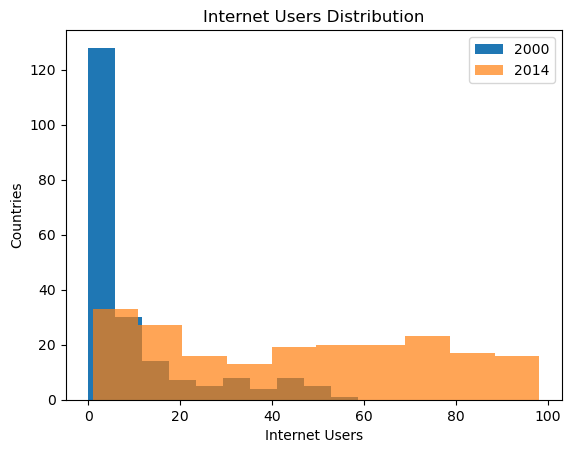

In [45]:
plt.hist(internet_2000,label='2000')
plt.hist(internet_2014,alpha=0.7, label='2014')
plt.legend()
plt.title('Internet Users Distribution')
plt.xlabel('Internet Users')
plt.ylabel('Countries')

In [46]:

#internet_2000_2014 = pd.merge(internet_2000, internet_2014,on='Country')

For how many countries was the percentage of internet users below 5% in 2014?

In [47]:
internet_df2014 = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'] < 5)]['Country'].count()


In [48]:
internet_df2014

np.int64(10)

Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [49]:
gdp_and_internet_use = pd.merge(internet_df,gdp_df,how='outer',on=['Country', 'Year'])
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,1990,0.000000,NaN
1,Afghanistan,2000,NaN,1617.826475
2,Afghanistan,2001,0.004723,1454.110782
3,Afghanistan,2002,0.004561,1774.308743
4,Afghanistan,2003,0.087891,1815.928200
...,...,...,...,...
9494,Zimbabwe,2019,26.588300,3294.806084
9495,Zimbabwe,2020,29.298600,2987.269823
9496,Zimbabwe,2021,32.461600,3184.785451
9497,Zimbabwe,2022,32.561500,3323.121932


 Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [50]:
highest_pct = gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values(by='Internet_Users_Pct', ascending=False).head(3)
highest_pct

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
3944,Iceland,2014,98.158,57981.199448
2867,Falkland (Malvinas) Islands,2014,97.600,NaN
824,Bermuda,2014,96.800,92298.387811


In [51]:
gdp_country_highest_pct = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(highest_pct['Country'])]
gdp_country_highest_pct

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
800,Bermuda,1990,0.0000,79109.890650
801,Bermuda,1991,NaN,75754.494259
802,Bermuda,1992,NaN,75160.932166
803,Bermuda,1993,NaN,76883.813796
804,Bermuda,1994,NaN,76850.912239
...,...,...,...,...
3949,Iceland,2019,99.5049,65065.905682
3950,Iceland,2020,99.5328,59575.190393
3951,Iceland,2021,99.6870,61685.835611
3952,Iceland,2022,99.8565,65563.920870


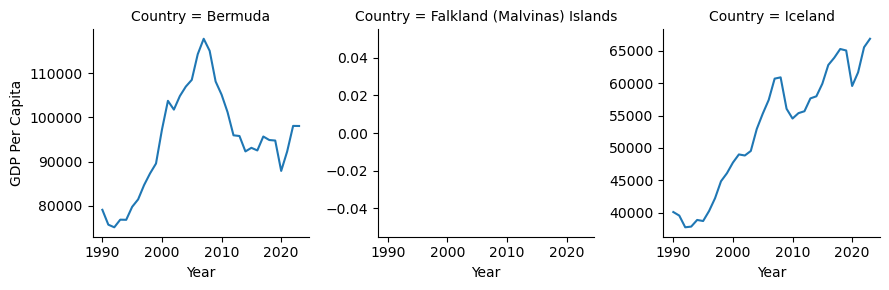

In [52]:
fg = sns.FacetGrid(gdp_country_highest_pct, col="Country",sharey=False)
fg.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")
fg.set_axis_labels("Year", "GDP Per Capita")
plt.show()

Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [53]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
15,Afghanistan,2014,7.0000,3017.942544
49,Africa Eastern and Southern,2014,NaN,4052.851526
83,Africa Western and Central,2014,NaN,4816.917355
117,Albania,2014,54.3000,12788.747231
151,Algeria,2014,29.5000,15073.762940
...,...,...,...,...
9361,West Bank and Gaza,2014,NaN,5990.426615
9395,World,2014,NaN,17307.606891
9424,Yemen,2014,22.5500,NaN
9455,Zambia,2014,6.5000,3585.577485


Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

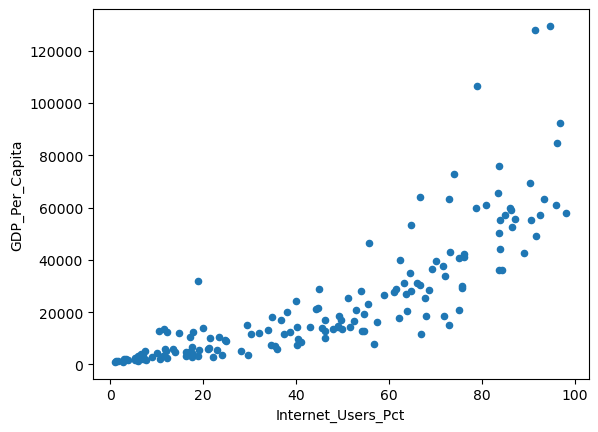

In [54]:
gdp_and_internet_use_2014.plot.scatter( 'Internet_Users_Pct','GDP_Per_Capita')

# A country’s internet_users_pct increases, the GDP_per_capita is increasing. There is positive correlation.

 **Stretch Question:** Use the `qcut` function from pandas to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [55]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],q=3,labels=['Low','Medium','High'])
gdp_and_internet_use_2014

C:\Users\divya\AppData\Local\Temp\ipykernel_20604\3943900895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],q=3,labels=['Low','Medium','High'])


,Country,Year,Internet_Users_Pct,GDP_Per_Capita,GDP_group
15,Afghanistan,2014,7.0000,3017.942544,Low
49,Africa Eastern and Southern,2014,NaN,4052.851526,Low
83,Africa Western and Central,2014,NaN,4816.917355,Low
117,Albania,2014,54.3000,12788.747231,Medium
151,Algeria,2014,29.5000,15073.762940,Medium
...,...,...,...,...,...
9361,West Bank and Gaza,2014,NaN,5990.426615,Low
9395,World,2014,NaN,17307.606891,Medium
9424,Yemen,2014,22.5500,NaN,NaN
9455,Zambia,2014,6.5000,3585.577485,Low


**Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [56]:
internetusers_median = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()
internetusers_median

C:\Users\divya\AppData\Local\Temp\ipykernel_20604\402178892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  internetusers_median = gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: Internet_Users_Pct, dtype: float64